<a href="https://colab.research.google.com/github/BindhyaAllam/Mini-Project/blob/main/Mini_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader 

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 163 µs (started: 2021-05-24 02:37:57 +00:00)


In [ ]:
!mkdir images
#Making a directory with name image 

time: 119 ms (started: 2021-05-24 02:38:02 +00:00)


In [ ]:
from bing_image_downloader import downloader 
downloader.download("Dolphin jumping", limit = 30 , output_dir='images ', adult_filter_off= False)



[!!]Indexing page: 1

[%] Indexed 16 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-hiewm_aLnVM/UDmg4EhNbLI/AAAAAAAABWw/L4yW_AEBEo8/s1600/jumping_dolphins_wallpaper-1024x768.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.diduknowonline.com/wp-content/uploads/2015/10/pink-Dolphins-fatcs.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.spirit-animals.com/wp-content/uploads/2012/09/Dolphin.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.babyanimalzoo.com/wp-content/uploads/2012/07/Baby-Dolphin-5552.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://bestanimations.com/Animals/Mammals/Dolphins/dolphin/dolphin-animated-gif-11.gif
[%] File Downloaded !

[%] Downloading Image #6 from https://www.bing.com/th/id/OGC.c07e39a274f1c9af7addbf4358009373?pid=1.7&amp;rurl=http%3a%2f%2fbestanimations.com%2fAnimals%2fMammals%2fDolphins%2fdolphin%2fdolphin-animated-gif-11.gif&amp;ehk=V3D9%2bT9nUqA8Zcu

In [ ]:
from bing_image_downloader import downloader
downloader.download("cute Cat", limit = 30 , output_dir='images ', adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.htcn.fr/blog/wp-content/uploads/2017/03/very-cute-kitty-wallpaper-background-576x1024.jpeg
[Error]Invalid image, not saving https://www.htcn.fr/blog/wp-content/uploads/2017/03/very-cute-kitty-wallpaper-background-576x1024.jpeg

[!] Issue getting: https://www.htcn.fr/blog/wp-content/uploads/2017/03/very-cute-kitty-wallpaper-background-576x1024.jpeg
[!] Error:: No active exception to reraise
[%] Downloading Image #1 from http://sonailicious.com/wp-content/uploads/2013/10/halloween-nail-art-2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://designbump.com/wp-content/uploads/2014/09/funny-jumping-cats-94__880.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://breakbrunch.com/wp-content/uploads/2020/04/bikini-girl-5e9905f6061e400b6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://cdn.goodshomedesign.com/wp-content/uploads/2013/12/book-christmas-tr

In [ ]:
# Preprocessing Data
#Step 1 - Resizing
#Step 2 - Flatting data

#importing libraries

import os 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize  #to resize images 

target = []
images = []
flat_data = []

DATADIR = '/content/images '
CATEGORIES = ['Dolphin jumping','cute Cat']

for category in CATEGORIES:   #To iterate in categories
   class_num = CATEGORIES.index(category)  #Labelling categories for easy access
   path = os.path.join(DATADIR,category)   #creating a path to iterate via images
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))  #reading images
     img_resized = resize(img_array,(150,150,3)) #resizing images
     flat_data.append(img_resized.flatten())     #flattening images
     images.append(img_resized)
     target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 16.4 s (started: 2021-05-24 02:58:49 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.47 ms (started: 2021-05-24 02:59:10 +00:00)


In [ ]:
#Splitting Data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)



time: 16 ms (started: 2021-05-24 02:59:16 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000], 'kernel':['linear']},
              { 'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},

]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 34.5 s (started: 2021-05-24 02:59:20 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

time: 42 ms (started: 2021-05-24 02:59:59 +00:00)


In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

time: 4.86 ms (started: 2021-05-24 03:00:02 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_pred,y_test)

#Accuracy 


0.9

time: 7.45 ms (started: 2021-05-24 03:00:10 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0],
       [ 2, 10]])

time: 11 ms (started: 2021-05-24 03:00:20 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

time: 20.7 ms (started: 2021-05-24 03:00:23 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 8.39 ms (started: 2021-05-24 03:00:26 +00:00)


Enter your URLhttps://cdn11.bigcommerce.com/s-nq6l4syi/images/stencil/1280x1280/products/6639/200017/33234-1024__01036.1603540839.jpg?c=2?imbypass=on
(1028, 1280, 3)
Predicted Output:Dolphin jumping


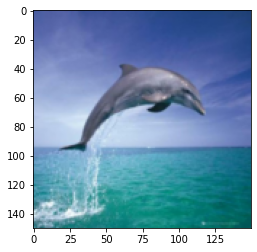

time: 4.84 s (started: 2021-05-24 03:01:24 +00:00)


In [ ]:
#Testing with an image
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')